# _**North American Large Mammal Detection**_

## Tahoe's Local Mammals
This code's objective is to use images of black bears and deer(Tahoe's Most Common Large Mammals)
to create an object detection model using yolov5! Here is an outline for this project
1. Import yolov5 model from github
2. Load Model
3. Label images
4. Convert labels into yaml file(yolov5 needs input in this format)
5. Train model
6. Analyze results
7. Try model yourself

# 1. Install and Import Dependencies

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt --upgrade

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [ ]:
pip install ipywidgets

In [ ]:
model = torch.hub.load('yolov5', 'yolov5s', source='local')

In [117]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Load and Label Images

### Find images at https://kaggle.com/datasets/1fd4a7f1b68aec84321a1a6c00a67cd0fae561c1c701774bce223ac30e6aa3ca

Download these images and if you want to use all of them, put them all in one folder; otherwise, only label images in directory you choose.

### To label the images, we are going to use labelme. The software allows us to draw boundary boxes and save the labled images as json files.

Citation:
author family-name: "Wada"  given-names: "Kentaro
  orcid: "https://orcid.org/0000-0002-6347-5156"
title: "Labelme: Image Polygonal Annotation with Python"
doi: 10.5281/zenodo.5711226
url: "https://github.com/wkentaro/labelme"
icense: GPL-3: GPL-3

In [ ]:
!git clone https://github.com/wkentaro/labelme.git

In [ ]:
!pip install labelme

### Run labelme, select directory with images and choose a directory to store labels, then label the images.
Here is a tutorial if needed: https://youtu.be/HiW3qeJVQCg 

In [ ]:
#run labelme
!labelme

# 4. Convert JSON Label Files into YAML

To convert JSON to YAML, we are going to use LabelMe2YOLO: https://github.com/rooneysh/Labelme2YOLO.git \
I found the instructions on https://pypi.org/project/labelme2yolo/ to be helpful; more so than the github

In [ ]:
!pip install labelme2yolo

In [ ]:
!labelme2yolo --json_dir /path/to/labelme_json_dir/ --val_size 0.15 --test_size 0.15
#labelme_json_dir is where your json files are

Once this is done, find dataset.yaml, it should be in labelme_json_dir/YOLODataset/dataset.yaml \
You will need to move it to yolov5 directory

# 5. Train Model

In [19]:
import os
os.environ['GIT_PYTHON_REFRESH'] = 'quiet'

In [ ]:
#Train Data, we set high epochs because the yolov5 will stop training once no performance increases are detected
!cd yolov5 & python train.py --img 640 --epochs 2000 --dir_with_yaml dataset.yaml --weights yolov5s.pt
#make sure paths in dataset.yaml are correct
'''
If this doesn't work:
- go to terminal
- cd /path/to/yolov5
- python train.py --img 640 --epochs 2000 --dir_with_yaml dataset.yaml --weights yolov5s.pt
'''

# 6. Analyze Results

In [103]:
performance_statistics = {} #stores performance curves
#Get paths to the performance statistics in yolov5 -> runs -> train -> exp# -> different_curves.png
performance_statistics['f1_curve'] = os.path.join('yolov5', 'runs', 'train' , 'exp7' , "F1_curve.png")
performance_statistics['P_curve'] = os.path.join('yolov5', 'runs', 'train' , 'exp7' , "P_curve.png")
performance_statistics['PR_curve'] = os.path.join('yolov5', 'runs', 'train' , 'exp7' , "PR_curve.png")
performance_statistics['R_curve'] = os.path.join('yolov5', 'runs', 'train' , 'exp7' , "R_curve.png")

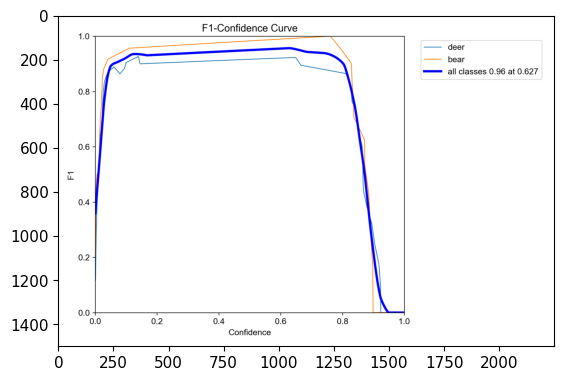

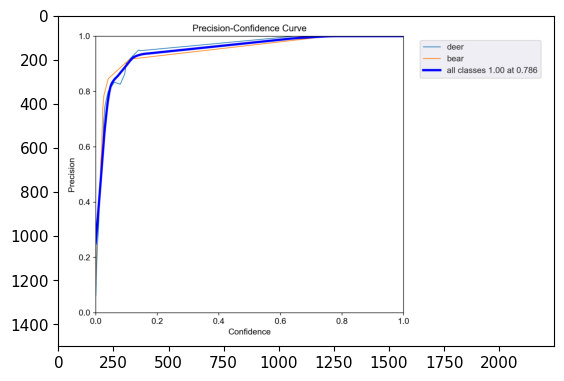

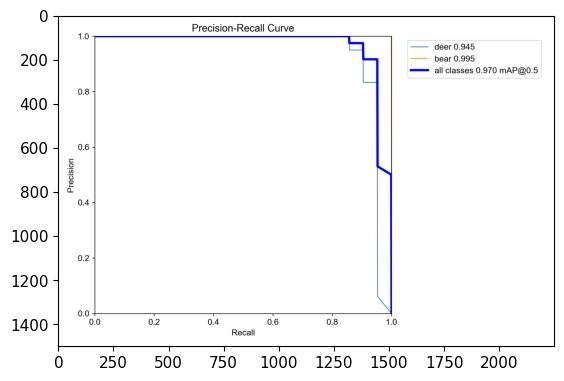

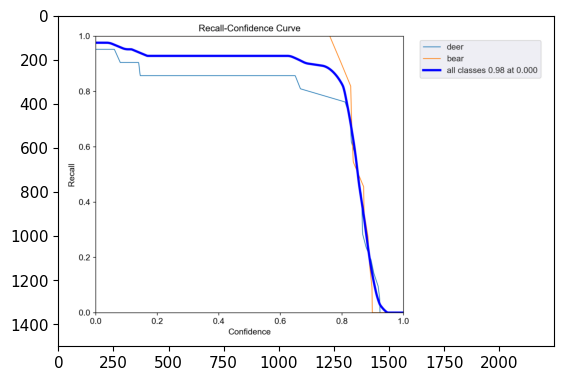

In [111]:
%matplotlib inline 
from PIL import Image
for key in performance_statistics:
    img = np.asarray(Image.open(performance_statistics[key]))
    imgplot = plt.imshow(img)
    plt.show()

# 7. Try Model Yourself!

In [ ]:
model = torch.hub.load('yolov5', 'custom', source='local', path="yolov5/runs/train/exp7/weights/best.pt" , force_reload=True)

In [128]:
img = os.path.join("unfinished_data" , "low_quality_images" , "04e472-20220509-a-black-bear-in-st-louis-park-300.png")
results = model(img)

In [129]:
results.print()

image 1/1: 225x300 1 bear
Speed: 7.0ms pre-process, 134.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


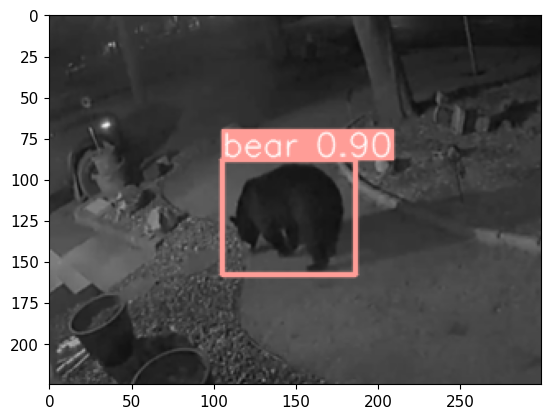

In [130]:
#plot model classification and boundary image
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

### Not Bad!
If you want to get a more accurate estimation, increase the size of your training set

### If you want to make model capture your screen and scroll through images:

In [84]:
# Import some dependencies
import pyautogui
import cv2

In [86]:
# Loop over the frames
while True: 
    # Take a screenshot 
    screen = pyautogui.screenshot()
    # Convert the output to a numpy array
    screen_array = np.array(screen)
    # Crop out the region we want - height, width, channels   
    cropped_region = screen_array[25:, 1300:, :]
    # Convert the color channel order
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    
    # Make detections 
    results = model(corrected_colors)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))

    # Cv2.waitkey
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
# Close down the frame
cv2.destroyAllWindows()